In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [4]:
data=pd.read_csv("../input/datadata2/parsed_data1.csv")

In [5]:
data.head()

,time_tag,density,speed,temperature,bx_gsm,by_gsm,bz_gsm,lon_gsm,lat_gsm,bt
0,2022-09-24 14:34:00.000,0.87,436.6,172003.0,-4.01,2.67,0.48,146.35,5.64,4.84
1,2022-09-24 14:35:00.000,0.94,435.7,175819.0,-4.08,2.56,0.37,147.92,4.44,4.83
2,2022-09-24 14:36:00.000,0.95,433.5,176454.0,-4.05,2.30,0.34,150.45,4.21,4.67
3,2022-09-24 14:37:00.000,0.92,430.9,185788.0,-4.26,2.13,-0.08,153.44,-0.98,4.77
4,2022-09-24 14:38:00.000,0.80,440.5,202613.0,-4.06,2.16,-0.51,151.98,-6.28,4.63


In [6]:
data.shape

(9705, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time_tag     9705 non-null   object 
 1   density      9703 non-null   float64
 2   speed        9690 non-null   float64
 3   temperature  9680 non-null   float64
 4   bx_gsm       9664 non-null   float64
 5   by_gsm       9664 non-null   float64
 6   bz_gsm       9664 non-null   float64
 7   lon_gsm      9664 non-null   float64
 8   lat_gsm      9664 non-null   float64
 9   bt           9664 non-null   float64
dtypes: float64(9), object(1)
memory usage: 758.3+ KB


In [8]:
data.describe()

,density,speed,temperature,bx_gsm,by_gsm,bz_gsm,lon_gsm,lat_gsm,bt
count,9703.000000,9690.000000,9.680000e+03,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000
mean,2.378635,440.609701,1.629100e+05,-1.322252,-0.224151,0.680793,204.941340,3.725056,6.971194
std,5.322659,92.690315,1.717016e+05,4.655903,4.897265,4.480902,93.806467,26.432847,4.404392
min,0.020000,281.200000,1.008000e+04,-11.190000,-25.370000,-17.770000,0.020000,-87.600000,0.350000
25%,0.430000,370.825000,6.063675e+04,-5.090000,-2.110000,-1.080000,142.850000,-9.472500,4.650000
50%,1.010000,446.200000,1.133595e+05,-2.560000,0.320000,0.200000,172.090000,2.120000,5.520000
75%,2.460000,500.100000,1.847198e+05,3.280000,2.762500,1.560000,300.952500,19.180000,7.530000
max,78.750000,737.800000,1.503487e+06,15.140000,17.680000,30.840000,360.000000,87.090000,31.450000


<AxesSubplot:>

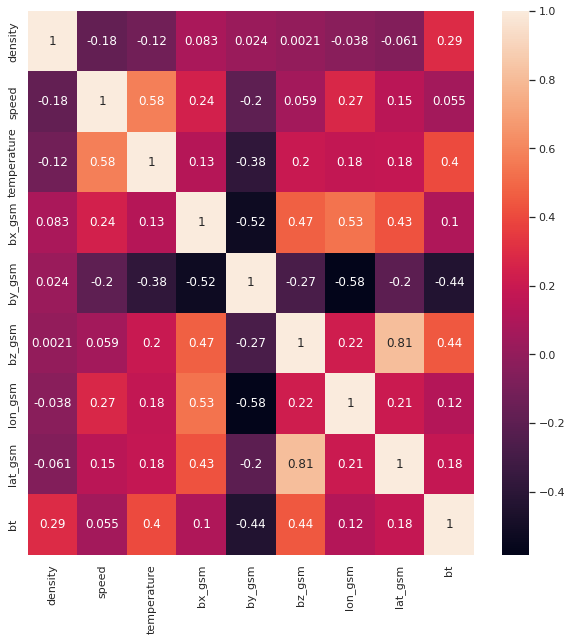

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [10]:
data.isnull().any()

time_tag       False
density         True
speed           True
temperature     True
bx_gsm          True
by_gsm          True
bz_gsm          True
lon_gsm         True
lat_gsm         True
bt              True
dtype: bool

In [11]:
data.isnull().sum()

time_tag        0
density         2
speed          15
temperature    25
bx_gsm         41
by_gsm         41
bz_gsm         41
lon_gsm        41
lat_gsm        41
bt             41
dtype: int64

In [12]:
data=data.dropna()

In [13]:
data.isna().sum()

time_tag       0
density        0
speed          0
temperature    0
bx_gsm         0
by_gsm         0
bz_gsm         0
lon_gsm        0
lat_gsm        0
bt             0
dtype: int64

In [14]:
data.shape

(9642, 10)

In [15]:
x=data['speed']
data=data.drop(['speed'], axis=1)

In [16]:
data['speed']=x

In [17]:
data.head()

,time_tag,density,temperature,bx_gsm,by_gsm,bz_gsm,lon_gsm,lat_gsm,bt,speed
0,2022-09-24 14:34:00.000,0.87,172003.0,-4.01,2.67,0.48,146.35,5.64,4.84,436.6
1,2022-09-24 14:35:00.000,0.94,175819.0,-4.08,2.56,0.37,147.92,4.44,4.83,435.7
2,2022-09-24 14:36:00.000,0.95,176454.0,-4.05,2.30,0.34,150.45,4.21,4.67,433.5
3,2022-09-24 14:37:00.000,0.92,185788.0,-4.26,2.13,-0.08,153.44,-0.98,4.77,430.9
4,2022-09-24 14:38:00.000,0.80,202613.0,-4.06,2.16,-0.51,151.98,-6.28,4.63,440.5


In [18]:
training_set = data.iloc[:, 1: 9].values

In [19]:
training_set.shape

(9642, 8)

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [21]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize 
# from scipy.signal import savgol_filter
# X_train = np.abs(np.fft.fft(X_train))
# X_train = normalized = normalize(X_train)
# X_train  = savgol_filter(X_train ,21,1,deriv=0)
# std_scaler = StandardScaler()
# X_train = std_scaler.fit_transform(X_train)
# # test_X = std_scaler.fit_transform(test_X)
# # test_X = normalize(test_X)
# # test_X = np.abs(np.fft.fft(test_X))

In [23]:
X_train.shape

(9582, 60)

In [24]:
y_train.shape

(9582,)

In [25]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [26]:
X_train.shape

(9582, 60, 1)

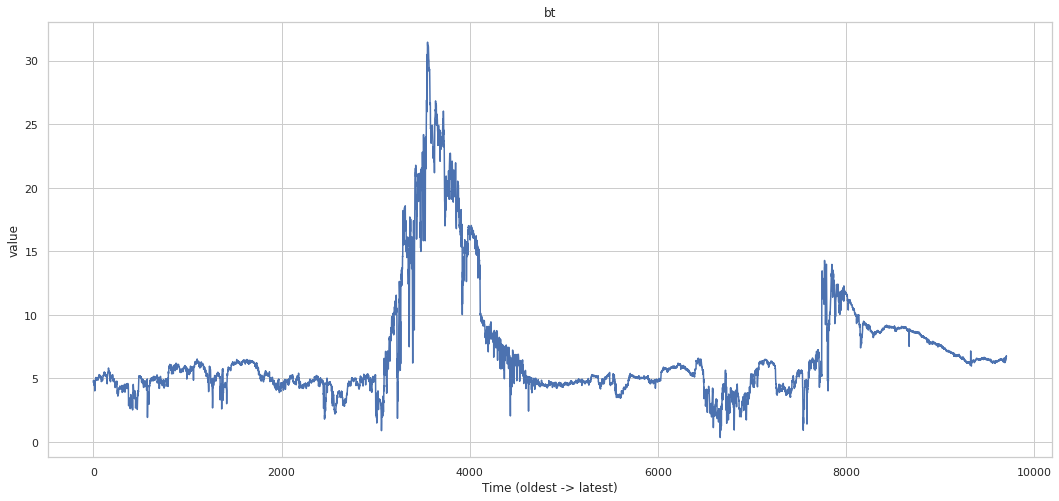

In [27]:
plt.figure(figsize=(18, 8))
plt.plot(data['bt'])
plt.title("bt")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("value")
plt.show()

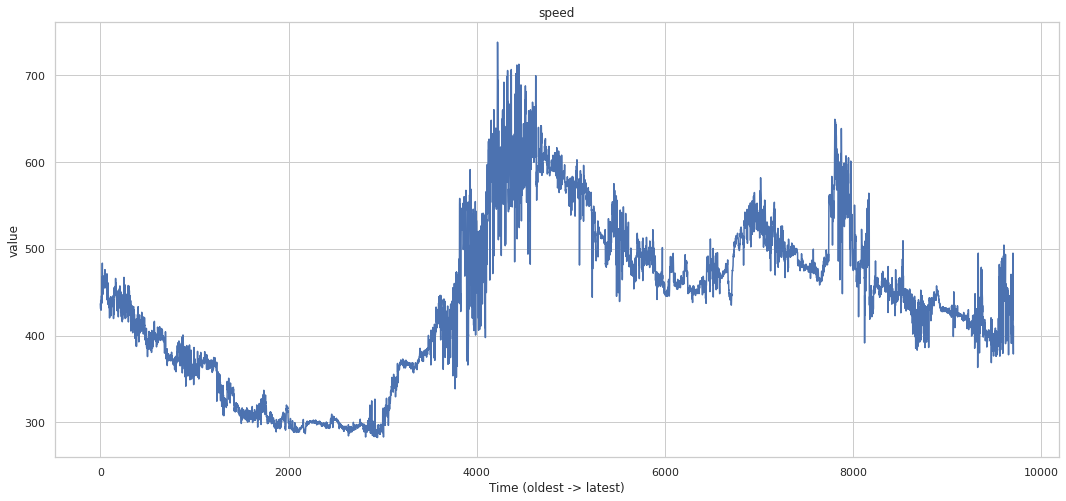

In [28]:
plt.figure(figsize=(18, 8))
plt.plot(data['speed'])
plt.title("speed")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("value")
plt.show()

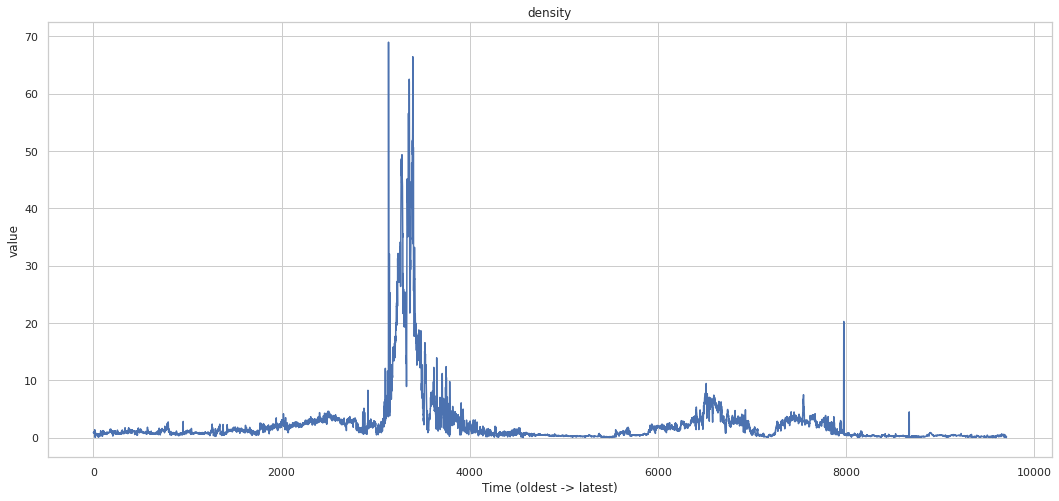

In [29]:
plt.figure(figsize=(18, 8))
plt.plot(data['density'])
plt.title("density")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("value")
plt.show()

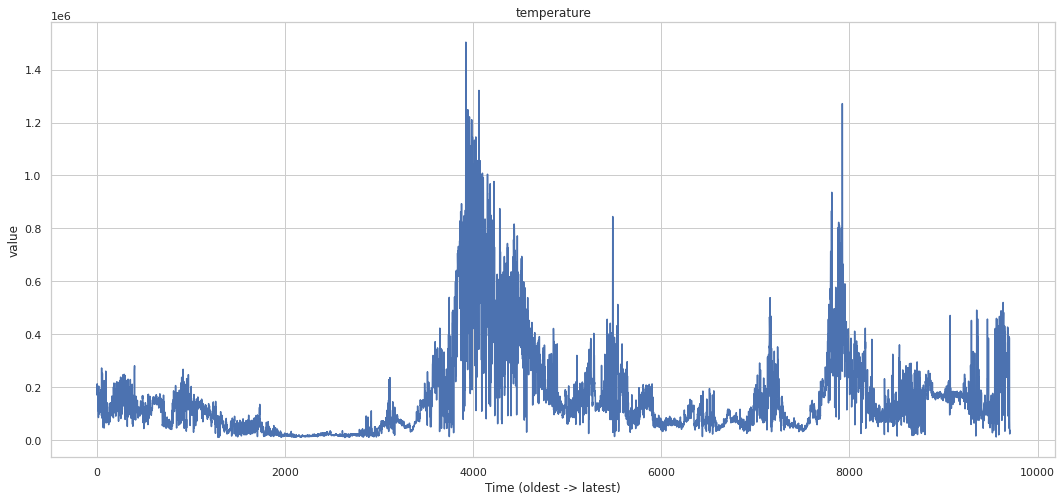

In [30]:
plt.figure(figsize=(18, 8))
plt.plot(data['temperature'])
plt.title("temperature")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("value")
plt.show()

In [31]:
model = Sequential()
#add 1st lstm layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

##add 3rd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

##add 4th lstm layer
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

##add output layer
model.add(Dense(units = 1))

2022-10-02 05:02:13.070671: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 05:02:13.079578: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 05:02:13.080243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 05:02:13.081976: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [32]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [34]:
history=model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100, validation_split=0.3)

2022-10-02 05:02:26.285520: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-10-02 05:02:31.143028: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


210/210 [==============================] - 13s 38ms/step - loss: 0.0018 - val_loss: 8.7539e-05
Epoch 2/100
210/210 [==============================] - 6s 30ms/step - loss: 0.0012 - val_loss: 4.4915e-04
Epoch 3/100
210/210 [==============================] - 7s 36ms/step - loss: 0.0011 - val_loss: 1.0168e-04
Epoch 4/100
210/210 [==============================] - 6s 31ms/step - loss: 0.0011 - val_loss: 1.5525e-04
Epoch 5/100
210/210 [==============================] - 7s 33ms/step - loss: 9.8443e-04 - val_loss: 1.0767e-04
Epoch 6/100
210/210 [==============================] - 7s 32ms/step - loss: 9.5463e-04 - val_loss: 8.5925e-05
Epoch 7/100
210/210 [==============================] - 7s 35ms/step - loss: 8.6671e-04 - val_loss: 9.0337e-05
Epoch 8/100
210/210 [==============================] - 7s 32ms/step - loss: 8.0651e-04 - val_loss: 7.3862e-05
Epoch 9/100
210/210 [==============================] - 7s 31ms/step - loss: 8.8346e-04 - val_loss: 1.5302e-04
Epoch 10/100
210/210 [===============

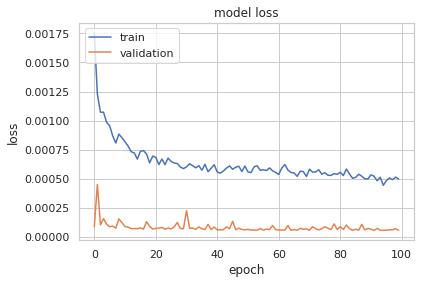

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
dataset_test=pd.read_csv("../input/datadata1/parsed_data2.csv", nrows=500)

In [38]:
dataset_test.head()

,time_tag,density,speed,temperature,bx_gsm,by_gsm,bz_gsm,lon_gsm,lat_gsm,bt
0,05:00.0,2.27,485.0,151898,-5.42,4.15,-1.43,142.58,-11.85,6.98
1,06:00.0,2.22,482.1,165325,-5.43,3.40,-1.82,147.92,-15.89,6.66
2,07:00.0,2.15,481.9,175776,-5.34,3.30,-2.09,148.30,-18.44,6.61
3,08:00.0,2.14,482.6,172342,-5.54,3.39,-2.03,148.55,-17.37,6.80
4,09:00.0,2.04,481.0,166651,-5.42,3.80,-2.27,144.97,-18.89,7.00


In [39]:
#keras only takes numpy array
real_stock_price = dataset_test.iloc[:, 1: 9].values
real_stock_price.shape

(500, 8)

In [40]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((data['bt'], dataset_test['bt']), axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [42]:
from keras.models import save_model
model.save("speed_predict.h5")

In [ ]:
len(inputs)

In [ ]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test.shape

In [ ]:
predicted_bt = model.predict(X_test)

In [ ]:
#inverse the scaled value
predicted_bt = sc.inverse_transform(predicted_bt)

In [ ]:
##visualize the prediction and real price
plt.plot(real_stock_price[0:100], color = 'red', label = 'Real bt')
plt.plot(predicted_bt[0:100], color = 'blue', label = 'Predicted bt')

plt.title('bt prediction')
plt.xlabel('Time')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
##visualize the prediction and real price
plt.plot(real_stock_price[0:50], color = 'red', label = 'Real bt')
plt.plot(predicted_bt[0:50], color = 'blue', label = 'Predicted bt')

plt.title('bt prediction')
plt.xlabel('Time')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
##visualize the prediction and real price
plt.plot(real_stock_price[0:200], color = 'red', label = 'Real bt')
plt.plot(predicted_bt[0:200], color = 'blue', label = 'Predicted bt')

plt.title('bt prediction')
plt.xlabel('Time')
plt.ylabel('value')
plt.legend()
plt.show()